In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Assignment.ipynb',
 'Bank Note Authentication.ipynb',
 'Bank Personal Loan.ipynb',
 'Bank_Personal_Loan_Modelling.csv',
 'datasets',
 'data_banknote_authentication.txt',
 'insurance.csv',
 'Matplotlib-TUTORIALS.html',
 'Numpy-TUTORIALS.html',
 'Pandas-TUTORIALS.html',
 'Statistics Assignment.ipynb',
 'udemy.csv',
 'vehicle.csv',
 'Vehicle.ipynb']

In [3]:
data = pd.read_csv("data_banknote_authentication.txt", names=["variance", "skewness", "curtosis", "entropy", "class"])
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Data Exploration

In [4]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


There is no missing values and values are already have right type.

In [6]:
data["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

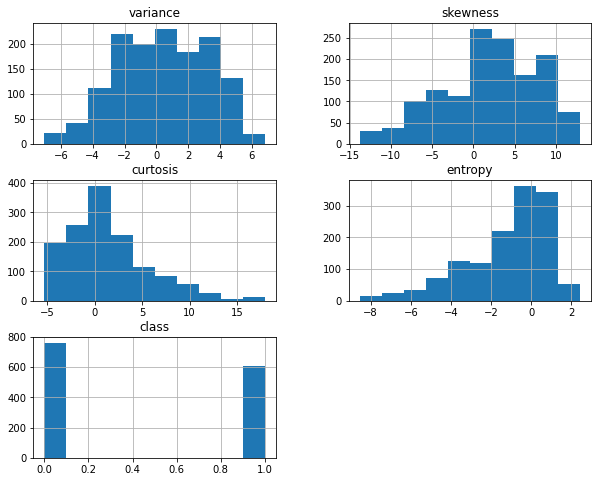

In [11]:
data.hist(figsize=(10, 8), bins=10);

In [12]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Variance and entropy feature must be positive or zero.

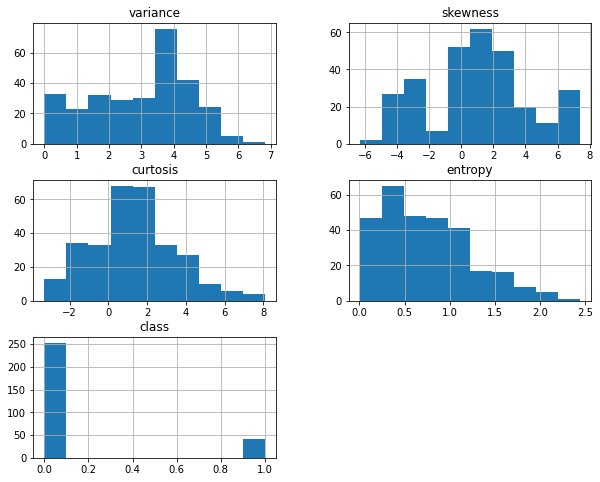

In [17]:
data[(data["variance"] >= 0) & (data["entropy"] >= 0)].hist(figsize=(10, 8), bins=10);

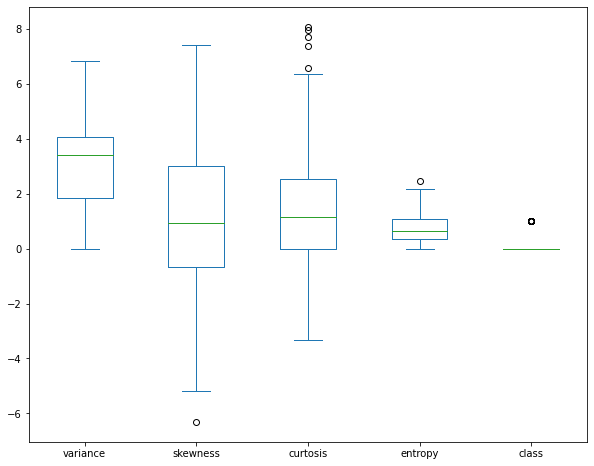

In [21]:
data[(data["variance"] >= 0) & (data["entropy"] >= 0)].plot(figsize=(10, 8), kind="box");

**Variance and skewness** are assumed to be normally distributed.

In [18]:
cleaned_data = data[(data["variance"] >= 0) & (data["entropy"] >= 0)]
cleaned_data.describe()

,variance,skewness,curtosis,entropy,class
count,295.000000,295.000000,295.000000,295.000000,295.000000
mean,3.012182,1.027630,1.354287,0.755533,0.142373
std,1.509878,3.151772,2.178852,0.503698,0.350026
min,0.003120,-6.317500,-3.311100,0.003003,0.000000
25%,1.837850,-0.664250,-0.026424,0.361190,0.000000
50%,3.424600,0.929100,1.169300,0.654720,0.000000
75%,4.080600,3.003550,2.531700,1.087900,0.000000
max,6.824800,7.416300,8.088300,2.449500,1.000000


There are lots of missing information when data is cleaned, therefore we will use imputation method to fill the missing values. However, **data must be splitting into training and testing data**.

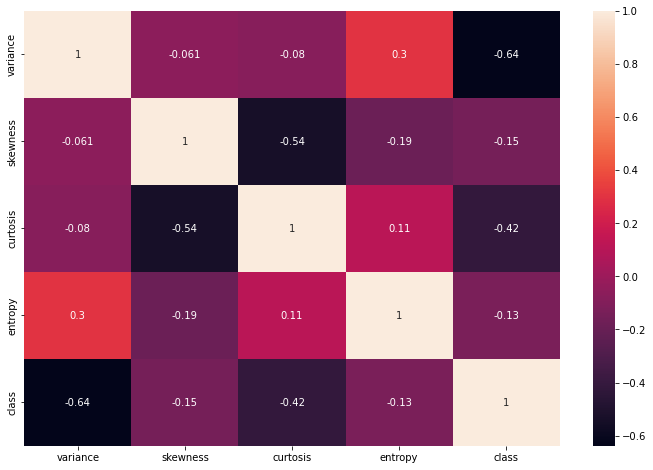

In [26]:
# Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_data.corr(), annot=True);

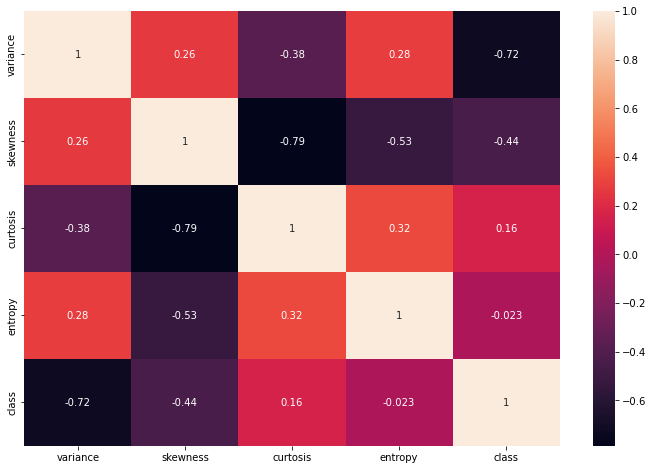

In [25]:
# Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True);

In [27]:
cleaned_data.describe()

,variance,skewness,curtosis,entropy,class
count,295.000000,295.000000,295.000000,295.000000,295.000000
mean,3.012182,1.027630,1.354287,0.755533,0.142373
std,1.509878,3.151772,2.178852,0.503698,0.350026
min,0.003120,-6.317500,-3.311100,0.003003,0.000000
25%,1.837850,-0.664250,-0.026424,0.361190,0.000000
50%,3.424600,0.929100,1.169300,0.654720,0.000000
75%,4.080600,3.003550,2.531700,1.087900,0.000000
max,6.824800,7.416300,8.088300,2.449500,1.000000


In [28]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [39]:
import warnings
warnings.filterwarnings("ignore")

# Imputation
new_cleaned_data = data.copy()

new_cleaned_data.loc[new_cleaned_data["variance"] < 0, "variance"] = cleaned_data["variance"].median()
new_cleaned_data.loc[new_cleaned_data["entropy"] < 0, "entropy"] = cleaned_data["entropy"].median()
new_cleaned_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,0.65472,0
1,4.54590,8.1674,-2.4586,0.65472,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,0.65472,0
4,0.32924,-4.4552,4.5718,0.65472,0


In [40]:
new_cleaned_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,2.940790,1.922353,1.397627,0.680275,0.444606
std,1.256397,5.869047,4.310030,0.284845,0.497103
min,0.003120,-13.773100,-5.286100,0.001710,0.000000
25%,2.228725,-1.708200,-1.574975,0.654720,0.000000
50%,3.424600,2.319650,0.616630,0.654720,0.000000
75%,3.424600,6.814625,3.179250,0.654720,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


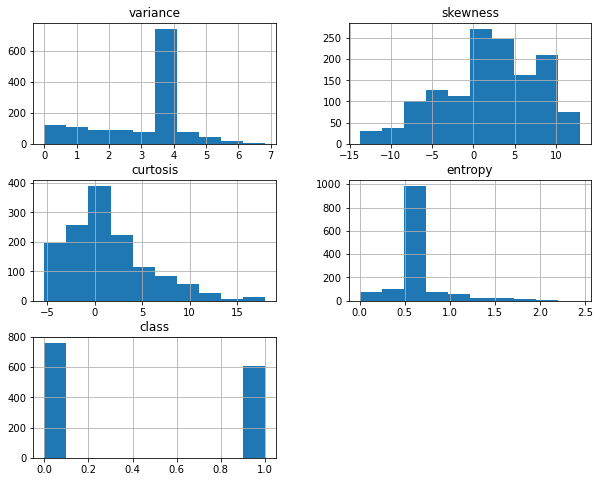

In [41]:
# Visualization
new_cleaned_data.hist(figsize=(10, 8), bins=10);

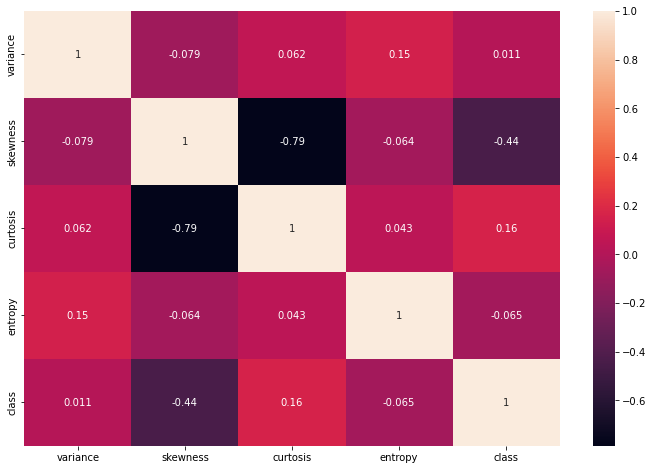

In [42]:
# Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(new_cleaned_data.corr(), annot=True);

Skewness and curtosis are highly negative-correlated. Also, **skewness has the highest correlation to the class**.

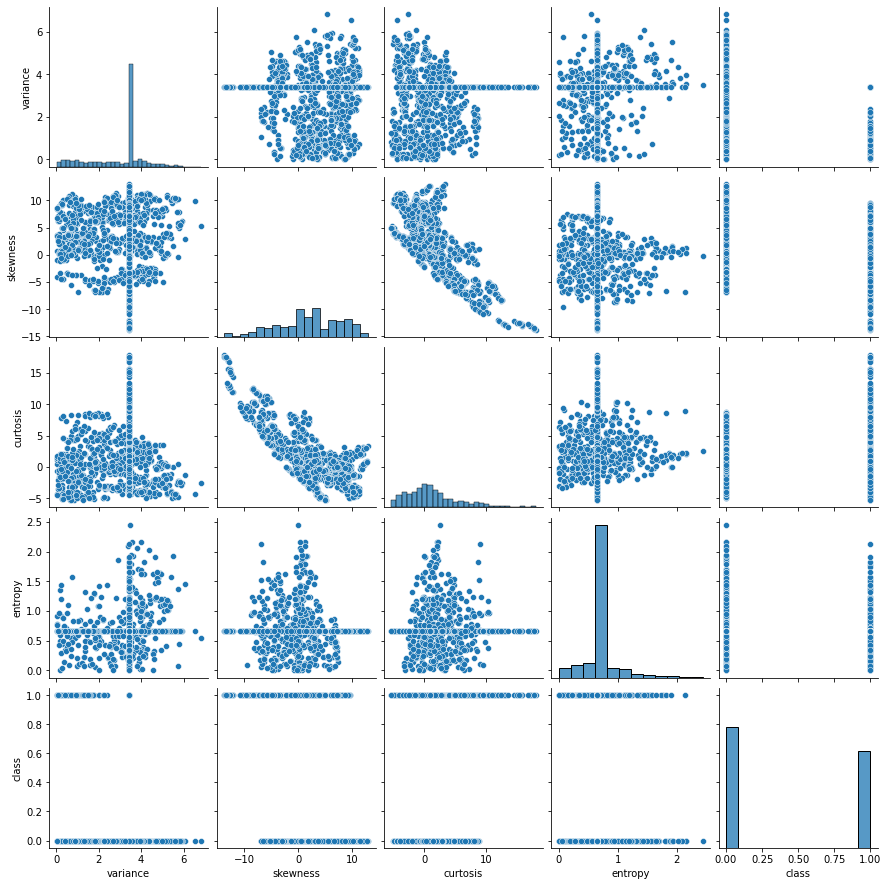

In [43]:
sns.pairplot(new_cleaned_data)

We will use both **"data" and "new_cleaned_data" to be input for our model**, then we will see which data whose model built on has the best performance.

### Data Preprocessing (1)

In [47]:
from sklearn.model_selection import train_test_split

# Use "data"
X = data.drop("class", axis=1)
Y = data["class"]

# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(f"Training Data:\n\n{Y_train.value_counts()}\n")
print(f"Testing Data:\n\n{Y_test.value_counts()}")

Training Data:

0    605
1    492
Name: class, dtype: int64

Testing Data:

0    157
1    118
Name: class, dtype: int64


In [48]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Let's assumed that all the features will contribute good performance on models, even without passing standardization.

### Model Building (1)

* Logistic Regression
* K-Nearest Neighbors
* SVM
* Decision Tree
* Random Forest Classifier
* XGBoost

In [60]:
from sklearn.model_selection import cross_val_score, KFold

def model_ranking(models_dict, features, targets):
    models = []
    accuracy = []
    for name, model in models_dict.items():
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        cross_val = cross_val_score(model, features, targets, cv=kfold, scoring="accuracy")
        
        models.append(name)
        accuracy.append(cross_val.mean())
        
    models_data = pd.DataFrame(data={"Model": models, "Performance": accuracy})
    return models_data.sort_values(by=["Performance"], ascending=False).reset_index(drop=True)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models_dict = {"Logistic Regression": LogisticRegression(),
               "KNN": KNeighborsClassifier(),
               "SVC": SVC(),
               "Decision Tree": DecisionTreeClassifier(max_depth=5),
               "Random Forest": RandomForestClassifier(),
               "XGBoost": XGBClassifier()
              }

models_summary = model_ranking(models_dict, X_train, Y_train)
models_summary

,Model,Performance
0,KNN,1.000000
1,SVC,0.997264
2,Random Forest,0.993620
3,XGBoost,0.992715
4,Logistic Regression,0.988157
5,Decision Tree,0.970818


**K-Nearest Neighbors** *with n_neighbors = 5* have the best performance on training and validation data

### Parameter Tuning (1)

In [69]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": range(5, 101, 5),
    "metric": ("euclidean", "manhattan", "minkowski", "cosine")
}

knn = KNeighborsClassifier()
grid_cv = GridSearchCV(estimator=knn, param_grid=params, cv=5, scoring="accuracy")
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan', 'minkowski',
                                    'cosine'),
                         'n_neighbors': range(5, 101, 5)},
             scoring='accuracy')

In [76]:
df_grid = pd.DataFrame(grid_cv.cv_results_)
df_grid.sort_values("rank_test_score", ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003935,0.001080,0.011424,0.002603,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.995455,1.0,1.0,1.0,1.000000,0.999091,0.001818,1
40,0.002801,0.000480,0.011233,0.000534,minkowski,5,"{'metric': 'minkowski', 'n_neighbors': 5}",0.995455,1.0,1.0,1.0,1.000000,0.999091,0.001818,1
20,0.002794,0.000601,0.010552,0.000355,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.995455,1.0,1.0,1.0,1.000000,0.999091,0.001818,1
1,0.003070,0.000504,0.010734,0.000406,euclidean,10,"{'metric': 'euclidean', 'n_neighbors': 10}",1.000000,1.0,1.0,1.0,0.995434,0.999087,0.001826,4
41,0.002896,0.000547,0.010937,0.000399,minkowski,10,"{'metric': 'minkowski', 'n_neighbors': 10}",1.000000,1.0,1.0,1.0,0.995434,0.999087,0.001826,4


In [77]:
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

### Model Testing (1)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



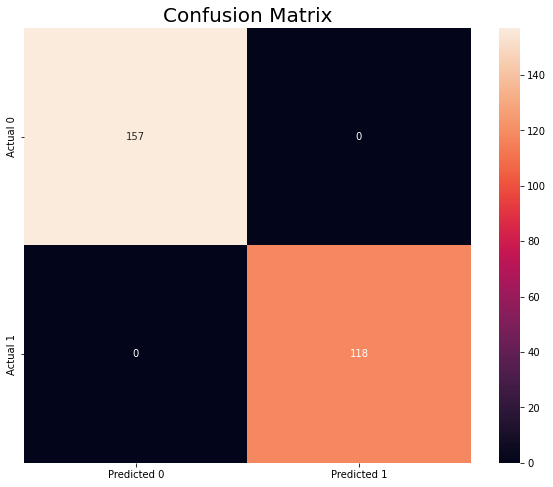

In [84]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(data=cm,
                     index=["Actual 0", "Actual 1"],
                     columns=["Predicted 0", "Predicted 1"]
                    )

plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt=".4g")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

### Data Processing (2)

In [85]:
from sklearn.model_selection import train_test_split

# Use "data"
X = new_cleaned_data.drop("class", axis=1)
Y = new_cleaned_data["class"]

# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(f"Training Data:\n\n{Y_train.value_counts()}\n")
print(f"Testing Data:\n\n{Y_test.value_counts()}")

Training Data:

0    605
1    492
Name: class, dtype: int64

Testing Data:

0    157
1    118
Name: class, dtype: int64


In [86]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Model Building (2)

In [87]:
models_dict = {"Logistic Regression": LogisticRegression(),
               "KNN": KNeighborsClassifier(),
               "SVC": SVC(),
               "Decision Tree": DecisionTreeClassifier(max_depth=5),
               "Random Forest": RandomForestClassifier(),
               "XGBoost": XGBClassifier()
              }

models_summary = model_ranking(models_dict, X_train, Y_train)
models_summary

,Model,Performance
0,XGBoost,0.976293
1,Random Forest,0.975380
2,Decision Tree,0.974454
3,KNN,0.949871
4,SVC,0.849614
5,Logistic Regression,0.774882


### Parameter Tuning (2)

In [89]:
params = {
    "n_estimators": (100, 200, 500, 1000),
    "max_depth": range(2, 6, 1),
    "learning_rate": (1e-1, 1e-2, 1e-3, 1e-4),
    "gamma": (100, 130, 150)
}

xgboost = XGBClassifier(random_state=42)
grid_cv = GridSearchCV(estimator=xgboost, param_grid=params, cv=5, scoring="accuracy")
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [94]:
df_grid = pd.DataFrame(grid_cv.cv_results_)
df_grid[df_grid["rank_test_score"] == 1].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.077485,0.004256,0.004600,0.000490,100,0.001,4,100,"{'gamma': 100, 'learning_rate': 0.001, 'max_de...",0.940909,0.922727,0.968037,0.926941,0.940639,0.939851,0.01585,1
41,0.161551,0.003240,0.004802,0.000402,100,0.001,4,200,"{'gamma': 100, 'learning_rate': 0.001, 'max_de...",0.940909,0.922727,0.968037,0.926941,0.940639,0.939851,0.01585,1
42,0.393226,0.005725,0.005002,0.000001,100,0.001,4,500,"{'gamma': 100, 'learning_rate': 0.001, 'max_de...",0.940909,0.922727,0.968037,0.926941,0.940639,0.939851,0.01585,1
44,0.082527,0.001672,0.004204,0.000397,100,0.001,5,100,"{'gamma': 100, 'learning_rate': 0.001, 'max_de...",0.940909,0.922727,0.968037,0.926941,0.940639,0.939851,0.01585,1
45,0.159945,0.001881,0.004704,0.000399,100,0.001,5,200,"{'gamma': 100, 'learning_rate': 0.001, 'max_de...",0.940909,0.922727,0.968037,0.926941,0.940639,0.939851,0.01585,1


In [95]:
grid_cv.best_params_

{'gamma': 100, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 100}

In [96]:
xgboost = XGBClassifier(random_state=42, n_estimators=100, max_depth=4, learning_rate=0.001, gamma=100)
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=100, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

### Model Testing (2)

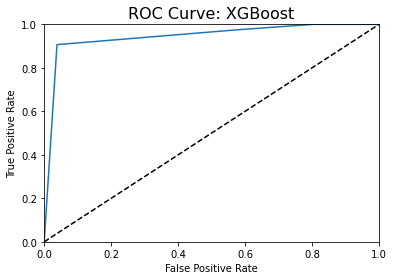

In [100]:
from sklearn.metrics import roc_curve

probas = xgboost.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: XGBoost", fontsize=16)
plt.show()

In [112]:
roc_df = pd.DataFrame([fpr, tpr, thresholds], index=["FPR", "TPR", "Threshold"]).T
roc_df

,FPR,TPR,Threshold
0,0.000000,0.000000,1.542221
1,0.006369,0.152542,0.542221
2,0.038217,0.906780,0.541895
3,0.573248,0.974576,0.461652
4,0.802548,1.000000,0.457805
5,1.000000,1.000000,0.453853


**A threshold of 0.541895** give the best performance to XGBoost model.

In [124]:
y_pred = xgboost.predict_proba(X_test)[:, 1] > 0.541895
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       157
           1       0.95      0.91      0.93       118

    accuracy                           0.94       275
   macro avg       0.94      0.93      0.94       275
weighted avg       0.94      0.94      0.94       275



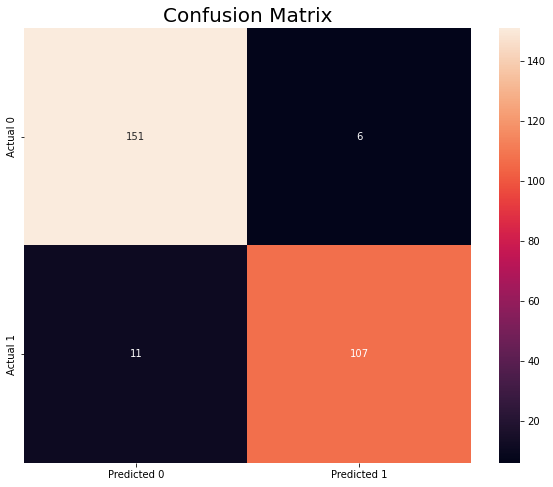

In [125]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(data=cm,
                     index=["Actual 0", "Actual 1"],
                     columns=["Predicted 0", "Predicted 1"]
                    )

plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt=".4g")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

### Conclusion

Data without passing cleaning process can give the best performance on model. However, the data is not interpretable since most data's variance and entropy are negative. **So, we will choose data named "new_cleaned_data" to build upon models. In this case, XGBoost is a right choice to build a classification model**.

By doing some hyperparameter tuning and cross validation, **the model is doing great by accuracy performance of 94%**.

Therefore, this model can be used to verify the bank note's originality.